In [59]:
import pandas as pd
import numpy as np
import pickle

Reading CSV files

In [60]:
target_df = pd.read_csv("files_for_lab/target.csv")
print(target_df.shape)

cat_df = pd.read_csv("files_for_lab/categorical.csv")
print(cat_df.shape)

num_df = pd.read_csv("files_for_lab/numerical.csv")
print(num_df.shape)

merged_df = target_df.merge(cat_df, left_index=True, right_index=True).merge(
    num_df, left_index=True, right_index=True)

print(merged_df.shape)

merged_df.head()

(95412, 2)
(95412, 22)
(95412, 315)
(95412, 339)


,TARGET_B,TARGET_D,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,0.0,IL,36,H,F,3,L,E,C,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,0,0.0,CA,14,H,M,3,L,G,A,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,0,0.0,NC,43,U,M,3,L,E,C,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,0.0,CA,44,U,F,3,L,E,C,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,0.0,FL,16,H,F,3,L,F,A,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


In [64]:
merged_df[['TARGET_B', 'TARGET_D']].loc[merged_df['TARGET_B'] == 1]['TARGET_D'].value_counts()

TARGET_D
10.00    941
15.00    591
20.00    577
5.00     503
25.00    392
        ... 
10.70      1
18.25      1
16.87      1
2.50       1
44.21      1
Name: count, Length: 70, dtype: int64

In [3]:
merged_df['TARGET_B'].value_counts()

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X = merged_df.drop(columns=['TARGET_B', 'TARGET_D'])
y = merged_df['TARGET_B']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [36]:
X_train.describe()
X_train_cat = X_train.select_dtypes(object)
X_train_num = X_train.select_dtypes(np.number)

X_test_cat = X_test.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)

In [37]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

scal.fit(X_train_num)

X_train_num_scaled = scal.transform(X_train_num)
X_test_num_scaled = scal.transform(X_test_num)

X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns=X_train_num.columns, index=X_test_num.index)

X_train_num_scaled_df.head()

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
43449,-0.361810,-2.571212,-1.241123,-0.987953,-0.023415,-1.305893,-0.293764,-0.542768,1.190691,0.949907,...,1.976430,-0.325975,0.179300,0.537574,2.023404,-0.112474,-1.148828,-1.001720,0.087147,-0.294982
92565,-1.750899,0.634806,-1.241123,-1.569920,-0.023415,0.961400,2.668909,-1.661827,-1.119373,0.374370,...,0.649962,-0.657222,-0.292707,-0.374469,0.794738,-0.598146,0.386212,0.998283,0.087147,-1.148571
73982,-0.847991,0.634806,0.114209,-0.405987,-0.023415,0.099828,1.352165,0.576291,1.190691,-1.927780,...,1.755352,0.226104,0.034067,-0.163998,-0.843482,0.204000,-0.066586,-1.001720,1.021122,-0.508379
49647,1.305098,-0.968203,0.114209,1.048928,-0.023415,0.054482,-0.622950,0.949311,0.163996,0.374370,...,-0.897584,1.330262,-0.002241,0.186788,0.112147,0.587359,-1.426100,0.998283,-0.846828,1.572243
17271,-0.917446,0.634806,-1.241123,0.757945,-0.023415,-1.305893,-0.293764,1.322331,-0.862699,-0.201167,...,-0.897584,0.226104,-0.365323,-0.514784,0.931257,-0.299754,1.211096,-1.001720,1.021122,-0.561728


In [38]:
from sklearn.preprocessing import OneHotEncoder

levels = [ list(X[col].unique()) for col in X_train_cat.columns ]

encoder = OneHotEncoder(drop='first', categories=levels).fit(X_train_cat)

X_train_cat_encoded_np = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded_np  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded_np, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded_np,  columns=encoder.get_feature_names_out(), index=X_test.index)

X_train_cat_encoded_df.head()

,STATE_CA,STATE_NC,STATE_FL,STATE_other,STATE_IN,STATE_MI,STATE_MO,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_G,RFA_2A_F,RFA_2A_D,GEOCODE2_A,GEOCODE2_D,GEOCODE2_B,DOMAIN_A_S,DOMAIN_A_R,DOMAIN_A_U,DOMAIN_A_C
43449,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
92565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
73982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
49647,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17271,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
X_train_enc = pd.concat([X_train_num, X_train_cat_encoded_df], axis=1)
X_test_enc = pd.concat([X_test_num, X_test_cat_encoded_df], axis=1)

display(X_train_enc.head())

X_train_scaled_enc = pd.concat([X_train_num_scaled_df, X_train_cat_encoded_df], axis=1)
X_test_scaled_enc = pd.concat([X_test_num_scaled_df, X_test_cat_encoded_df], axis=1)

display(X_train_scaled_enc.head())

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,RFA_2A_G,RFA_2A_F,RFA_2A_D,GEOCODE2_A,GEOCODE2_D,GEOCODE2_B,DOMAIN_A_S,DOMAIN_A_R,DOMAIN_A_U,DOMAIN_A_C
43449,23,1,1,88,1,0,2,91,11,96,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
92565,3,3,1,86,1,50,11,88,2,95,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
73982,16,3,2,90,1,31,7,94,11,91,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
49647,47,2,2,95,1,30,1,95,7,95,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17271,15,3,1,94,1,0,2,96,3,94,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,RFA_2A_G,RFA_2A_F,RFA_2A_D,GEOCODE2_A,GEOCODE2_D,GEOCODE2_B,DOMAIN_A_S,DOMAIN_A_R,DOMAIN_A_U,DOMAIN_A_C
43449,-0.361810,-2.571212,-1.241123,-0.987953,-0.023415,-1.305893,-0.293764,-0.542768,1.190691,0.949907,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
92565,-1.750899,0.634806,-1.241123,-1.569920,-0.023415,0.961400,2.668909,-1.661827,-1.119373,0.374370,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
73982,-0.847991,0.634806,0.114209,-0.405987,-0.023415,0.099828,1.352165,0.576291,1.190691,-1.927780,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
49647,1.305098,-0.968203,0.114209,1.048928,-0.023415,0.054482,-0.622950,0.949311,0.163996,0.374370,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17271,-0.917446,0.634806,-1.241123,0.757945,-0.023415,-1.305893,-0.293764,1.322331,-0.862699,-0.201167,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


The Accuracy for the Random Forest in the TRAIN set is 0.95
The Accuracy for the Random Forest in the TEST  set is 0.95


NameError: name 'plt' is not defined

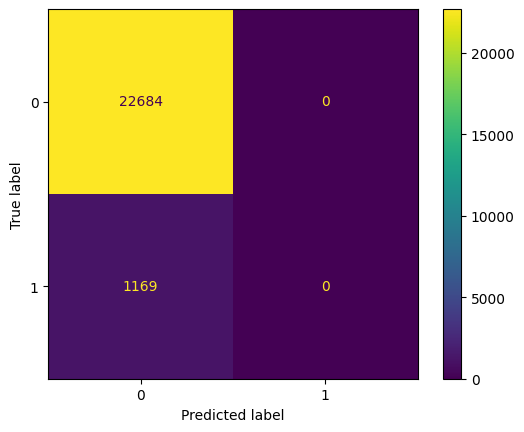

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

model.fit(X_train_enc, y_train)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(model.score(X_train_enc, y_train)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(model.score(X_test_enc, y_test)))

y_test_pred = model.predict(X_test_enc)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=model.classes_)
disp.plot()

Before upsampling, random forest classification model accuracy is 0.95% but not predicting any instances of TARGET_B being 1, only 0. 

In [53]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(
                             max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 69
)

model.fit(X_train_enc, y_train)

scores = cross_val_score(model, X_train_enc, y_train, cv=10)

print("The mean Accuracy of the folds was {:.2f}".format(np.mean(scores)))
print("The standard deviation of the folds was {:.2f}".format(np.std(scores)))


The mean Accuracy of the folds was 0.95
The standard deviation of the folds was 0.00


Fixing Imbalance in y_train

In [49]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=69)
X_train_enc_smote, y_train_smote = sm.fit_resample(X_train_enc, y_train)

In [51]:
display(y_train_smote.value_counts())
display(X_train_enc_smote)

TARGET_B
0    67885
1    67885
Name: count, dtype: int64

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,RFA_2A_G,RFA_2A_F,RFA_2A_D,GEOCODE2_A,GEOCODE2_D,GEOCODE2_B,DOMAIN_A_S,DOMAIN_A_R,DOMAIN_A_U,DOMAIN_A_C
0,23,1,1,88,1,0,2,91,11,96,...,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.0
1,3,3,1,86,1,50,11,88,2,95,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0
2,16,3,2,90,1,31,7,94,11,91,...,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0
3,47,2,2,95,1,30,1,95,7,95,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
4,15,3,1,94,1,0,2,96,3,94,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135765,24,3,1,92,1,50,7,92,2,95,...,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
135766,36,2,2,86,1,0,2,87,11,94,...,0.000000,0.942605,0.0,0.000000,0.057395,0.000000,0.000000,0.0,0.0,0.0
135767,7,3,2,87,1,47,1,89,4,95,...,0.117478,0.882522,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0
135768,26,2,1,91,1,35,1,91,4,94,...,0.000000,1.000000,0.0,0.373805,0.000000,0.626195,0.373805,0.0,0.0,0.0


The Accuracy for the Random Forest in the TRAIN set is 0.90
The Accuracy for the Random Forest in the TEST  set is 0.85


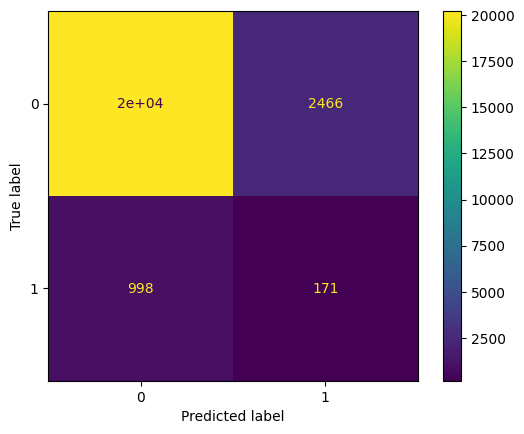

In [52]:
model = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

model.fit(X_train_enc_smote, y_train_smote)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(model.score(X_train_enc_smote, y_train_smote)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(model.score(X_test_enc, y_test)))

y_test_pred = model.predict(X_test_enc)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=model.classes_)
disp.plot()

In [86]:
model = RandomForestClassifier(
                             max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 69
)

model.fit(X_train_enc_smote, y_train_smote)

scores = cross_val_score(model, X_train_enc_smote, y_train_smote, cv=10)

print("The mean Accuracy of the upsampled folds was {:.2f}".format(np.mean(scores)))
print("The standard deviation of the upsampled folds was {:.2f}".format(np.std(scores)))

The mean Accuracy of the upsampled folds was 0.89
The standard deviation of the upsampled folds was 0.06


False negative means someone has actually donated when the model predicts they have not. 
False positive means someone hasn't donated when the model predicts they have. 


In [ ]:
# Calculating higher impact on business scenario.
 
y_test_donations = [val for val in merged_df['TARGET_D'][list(y_test.index)] if val > 0]
num_y_test_donations = len(y_test_donations)
average_donation_y_test = round(sum(y_test_donations)/num_y_test_donations, 2)
print("The average donation made for people who did donate in y_test is {}".format(average_donation_y_test))
false_positives = 2466 # taken from confusion matrix on y_test and y_test_pred
false_negatives = 998 # taken from confusion matrix on y_test and y_test_pred
false_positive_donation_sum = false_positives * average_donation_y_test
false_negative_donation_sum = false_negatives * average_donation_y_test
print("")
print("Incorrectly predicted donations, false positives, leading to higher donation projections are ${:.2f}".format(false_positive_donation_sum))
print("Missed donations in the predictions, false negatives, leading to lower donation projections are ${:.2f}".format(false_negative_donation_sum))
print("")
print("Since the false positives lead to worse overall financial projections in this scenario, the score for false positives should be prioritised as the metric to imrpove performance on.")


In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, average_precision_score, average_precision_score


param_grid = {
    'n_estimators': [50, 100, 150], # represents the number of trees in the forest. Higher values can improve performance byt also increase computation time. 
    # Consider trying [10, 50, 100, 200]
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf' : [3, 5], # [2, 5, 10] commonly used. 
    'max_depth':[None, 10, 20], # essential to use to avoid overfitting
    'max_features': ['auto', 'log2', 'sqrt'] # round(sqrt(#cols))
    }

model = RandomForestClassifier(
                             max_samples=0.8,
                             random_state = 69
)

scorers = {
    "Precision Score": make_scorer(precision_score),
    "Accuracy Score": make_scorer(average_precision_score),
    "Average Precision Score": make_scorer(average_precision_score)
            }

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorers, 
                           return_train_score=True,n_jobs=-1, verbose = 20, refit='Precision Score')

grid_search.fit(X_train_enc_smote, y_train_smote)

results = grid_search.cv_results_
print("results:")
print(results)

best_params = grid_search.best_params_
print("Best parameters")
print(best_params)

best_model = grid_search.best_estimator_
print("Best model:")
print(best_model)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[CV 2/5; 1/216] START max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 3/5; 2/216] START max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 3/5; 1/216] START max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 1/5; 1/216] START max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 5/5; 1/216] START max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 2/5; 2/216] START max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 4/5; 1/216] START max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50
[CV 1/5; 2/216] START max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 2/5; 2/216] END max_depth=None, max_features=auto, min_samples_leaf=3, min_sample

/Users/HenrySoysa/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
204 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/HenrySoysa/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/HenrySoysa/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/HenrySoysa/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 638, in _validate_params
    val

results:
{'mean_fit_time': array([1.29320025e+00, 9.81872511e-01, 5.38474560e-01, 5.72456169e-01,
       6.16538334e-01, 6.39421320e-01, 6.23890781e-01, 6.10325146e-01,
       6.21475506e-01, 5.55680990e-01, 6.01499176e-01, 6.00919867e-01,
       8.02230835e-01, 7.94346237e-01, 1.20367522e+00, 9.48535299e-01,
       8.26318502e-01, 5.79599476e-01, 6.67351580e-01, 8.41080952e-01,
       7.07181025e-01, 7.32933092e-01, 6.28394747e-01, 6.41756487e-01,
       9.66514206e+01, 1.16243747e+02, 1.15360952e+02, 3.64688310e+01,
       7.31647094e+01, 1.06805444e+02, 3.47151213e+01, 7.19794240e+01,
       1.02082982e+02, 3.34673542e+01, 6.01636917e+01, 1.22069447e+02,
       5.36102777e+01, 1.63411882e+02, 2.11019751e+02, 6.48207677e+01,
       1.56657667e+02, 1.88257219e+02, 5.98009656e+01, 1.10796544e+02,
       1.64888749e+02, 5.81037501e+01, 1.84513884e+02, 1.79245503e+02,
       8.91895187e+01, 1.67648448e+02, 2.61313223e+02, 9.46273461e+01,
       1.80709916e+02, 2.11450410e+02, 6.94902181e

In [ ]:
# copying same code from above but reducing hyperparameter range. 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, average_precision_score, average_precision_score


param_grid = {
    'n_estimators': [50, 100], # represents the number of trees in the forest. Higher values can improve performance byt also increase computation time. 
    # Consider trying [10, 50, 100, 200]
    'min_samples_split': [2, 5],
    'min_samples_leaf' : [3, 5], # [2, 5, 10] commonly used. 
    'max_depth':[None, 10], # essential to use to avoid overfitting
    'max_features': ['auto', 'sqrt'] # round(sqrt(#cols))
    }

model = RandomForestClassifier(
                             max_samples=0.8,
                             random_state = 69
)

scorers = {
    "Precision Score": make_scorer(precision_score),
    "Accuracy Score": make_scorer(average_precision_score),
    "Average Precision Score": make_scorer(average_precision_score)
            }

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorers, 
                           return_train_score=True,n_jobs=-1, verbose = 20, refit='Precision Score')

grid_search.fit(X_train_enc_smote, y_train_smote)

results = grid_search.cv_results_
print("results:")
print(results)

best_params = grid_search.best_params_
print("Best parameters")
print(best_params)

best_model = grid_search.best_estimator_
print("Best model:")
print(best_model)


In [58]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, max_samples=0.8, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=150, random_state=69)

In [ ]:
#model = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

model.fit(X_train_enc_smote, y_train_smote)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(model.score(X_train_enc_smote, y_train_smote)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(model.score(X_test_enc, y_test)))

y_test_pred = model.predict(X_test_enc)

cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=model.classes_)
disp.plot()